<a href="https://colab.research.google.com/github/ratneshpuri/Credit-Card-Default-Risk/blob/main/American_Express.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
data=pd.read_csv("train.csv")

## Checking Info

In [212]:
data.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [213]:
data.shape

(45528, 19)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [215]:
data.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


In [216]:
print("Total number of missing vaues form each column:-")
print()
print(data.isna().sum())

Total number of missing vaues form each column:-

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64


In [217]:
print("%age of value missing from each column:-")
print()
print(data.isna().sum()/data.shape[0])

%age of value missing from each column:-

customer_id                0.000000
name                       0.000000
age                        0.000000
gender                     0.000000
owns_car                   0.012015
owns_house                 0.000000
no_of_children             0.017001
net_yearly_income          0.000000
no_of_days_employed        0.010170
occupation_type            0.000000
total_family_members       0.001823
migrant_worker             0.001911
yearly_debt_payments       0.002087
credit_limit               0.000000
credit_limit_used(%)       0.000000
credit_score               0.000176
prev_defaults              0.000000
default_in_last_6months    0.000000
credit_card_default        0.000000
dtype: float64


In [218]:
data['age'].dropna(inplace=True)

In [219]:
print(data.shape)
data.isna().sum()

(45528, 19)


customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

## Age

In [220]:
data['age'].head()

0    46
1    29
2    37
3    39
4    46
Name: age, dtype: int64

In [221]:
data['age'].isna().sum()

0

In [222]:
data['age'].unique()

array([46, 29, 37, 39, 38, 40, 32, 52, 43, 24, 41, 34, 50, 36, 42, 23, 27,
       26, 30, 35, 48, 53, 47, 28, 33, 49, 51, 55, 54, 25, 31, 44, 45])

[]

<Figure size 720x504 with 0 Axes>

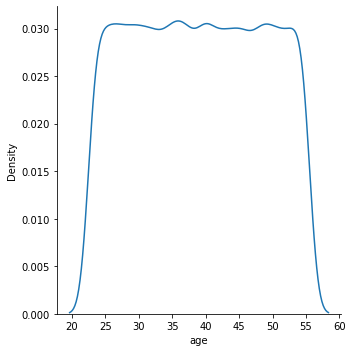

In [223]:
plt.figure(figsize=(10,7))
sns.displot(x=data['age'],kind='kde')
plt.plot()

[]

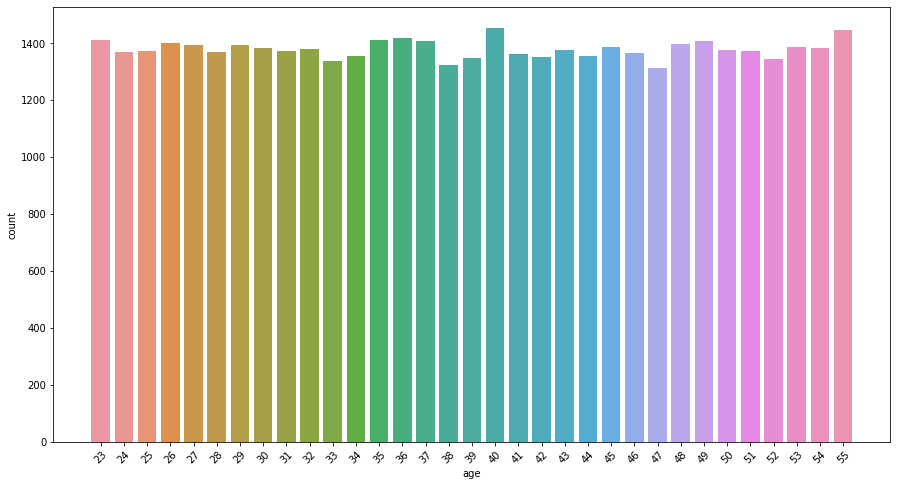

In [224]:
plt.figure(figsize=(15,8))
sns.countplot(x=data['age'])
plt.xticks(rotation=45)
plt.plot()

[]

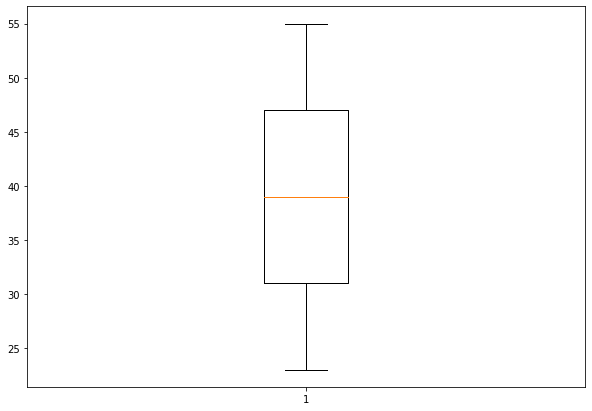

In [225]:
plt.figure(figsize=(10,7))
plt.boxplot(x=data['age'])
plt.plot()

## Gender

In [226]:
data['gender'].head()

0    F
1    M
2    M
3    F
4    M
Name: gender, dtype: object

In [227]:
data['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [228]:
data['gender'].value_counts()

F      29957
M      15570
XNA        1
Name: gender, dtype: int64

In [229]:
data['gender'].isna().sum()

0

In [230]:
data[data['gender']=='XNA']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
28498,CST_144669,ernard,52,XNA,N,Y,2.0,203596.95,2806.0,Low-skill Laborers,4.0,0.0,14700.2,65487.34,40,669.0,0,0,0


[]

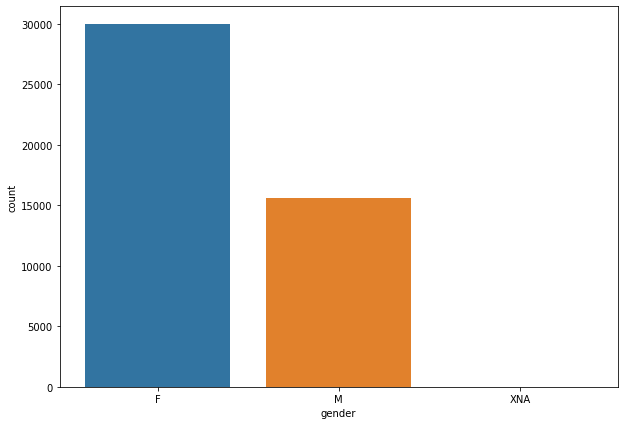

In [231]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['gender'])
plt.plot()

## Owns_Car

In [232]:
data['owns_car'].head()

0    N
1    N
2    N
3    N
4    Y
Name: owns_car, dtype: object

In [233]:
data['owns_car'].unique()

array(['N', 'Y', nan], dtype=object)

In [234]:
data['owns_car'].value_counts()

N    29743
Y    15238
Name: owns_car, dtype: int64

In [235]:
data['owns_car'].isna().sum()

547

In [236]:
data[data['owns_car'].isna()]

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
8,CST_133768,Ashutosh,40,F,NaN,Y,0.0,210091.43,11551.0,Laborers,2.0,0.0,21521.89,65037.74,14,783.0,0,0,0
40,CST_156606,Taylor,47,F,NaN,Y,0.0,229370.35,352.0,Sales staff,2.0,0.0,35347.36,27213.73,87,733.0,0,0,0
119,CST_110661,Caroline Valetkevitch,45,M,NaN,Y,0.0,213866.59,2272.0,Core staff,2.0,0.0,22836.78,71050.18,21,802.0,0,0,0
150,CST_144508,Kevin,43,M,NaN,Y,0.0,610226.68,3251.0,Managers,2.0,0.0,48463.33,148288.36,78,823.0,0,0,0
183,CST_131607,Aruna,25,M,NaN,N,0.0,122705.67,2447.0,Managers,2.0,0.0,34009.63,16517.28,16,665.0,0,0,0
284,CST_109130,Steve Gorman,38,F,NaN,Y,1.0,337080.84,2230.0,Sales staff,3.0,0.0,37204.67,67526.67,24,875.0,0,0,0
297,CST_117708,David Ingram,31,F,NaN,Y,1.0,218259.80,7469.0,Medicine staff,3.0,0.0,28413.97,51180.94,45,802.0,0,0,0
334,CST_155106,Ablan,31,F,NaN,Y,0.0,206675.04,592.0,Security staff,1.0,0.0,19247.29,24950.10,27,928.0,0,0,0
338,CST_136725,Soyoung,55,M,NaN,N,1.0,349946.55,7179.0,Laborers,3.0,0.0,29527.08,120337.26,73,949.0,0,0,0
384,CST_138201,Soyoung,26,F,NaN,Y,0.0,181031.37,10622.0,Accountants,2.0,0.0,50731.57,49489.66,20,862.0,0,0,0


In [237]:
data['owns_car'].fillna(data['owns_car'].mode()[0],inplace=True)

In [238]:
data['owns_car'].isna().sum()

0

In [239]:
data['owns_car'].value_counts()

N    30290
Y    15238
Name: owns_car, dtype: int64

[]

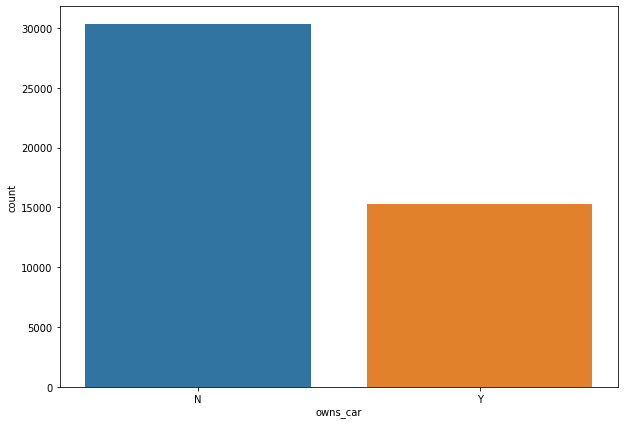

In [240]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['owns_car'])
plt.plot()

## Owns_House

In [241]:
data['owns_house'].head()

0    Y
1    Y
2    Y
3    Y
4    Y
Name: owns_house, dtype: object

In [242]:
data['owns_house'].unique()

array(['Y', 'N'], dtype=object)

In [243]:
data['owns_house'].value_counts()

Y    31642
N    13886
Name: owns_house, dtype: int64

In [244]:
data['owns_house'].isna().sum()

0

[]

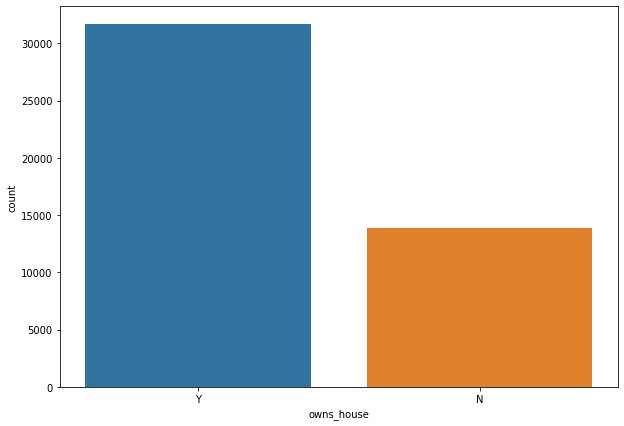

In [245]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['owns_house'])
plt.plot()

## No_of_children

In [246]:
data['no_of_children'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: no_of_children, dtype: float64

In [247]:
data['no_of_children'].unique()

array([ 0.,  1.,  2., nan,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [248]:
data['no_of_children'].value_counts()

0.0    31241
1.0     8985
2.0     3862
3.0      584
4.0       60
5.0       13
6.0        6
7.0        1
9.0        1
8.0        1
Name: no_of_children, dtype: int64

In [249]:
data['no_of_children'].isna().sum()

774

In [250]:
data['no_of_children'].fillna(data['no_of_children'].mode()[0],inplace=True)

In [251]:
data['no_of_children'].isna().sum()

0

[]

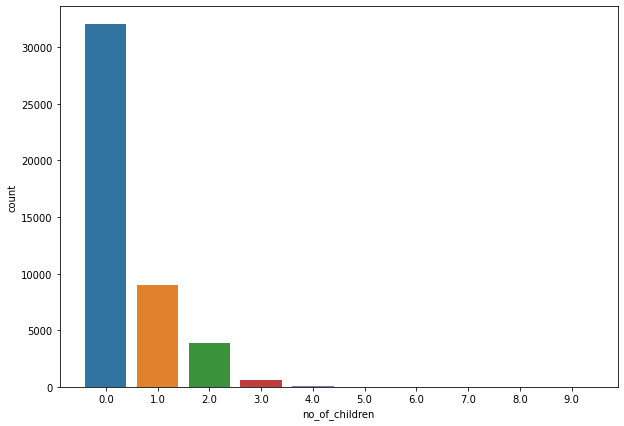

In [252]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['no_of_children'])
plt.plot()

[]

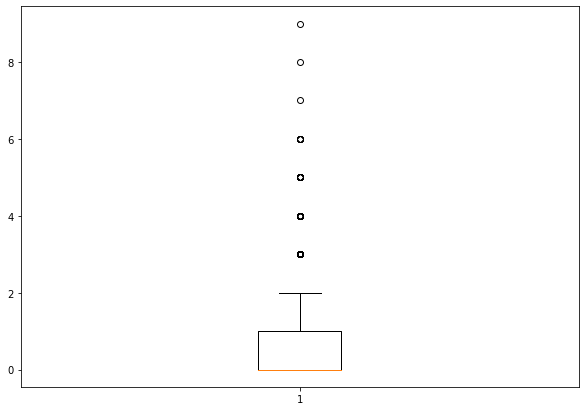

In [253]:
plt.figure(figsize=(10,7))
plt.boxplot(x=data['no_of_children'])
plt.plot()

## Net_yearly_income

In [254]:
data['net_yearly_income'].head()

0    107934.04
1    109862.62
2    230153.17
3    122325.82
4    387286.00
Name: net_yearly_income, dtype: float64

In [255]:
data['net_yearly_income'].isna().sum()

0

[]

<Figure size 720x504 with 0 Axes>

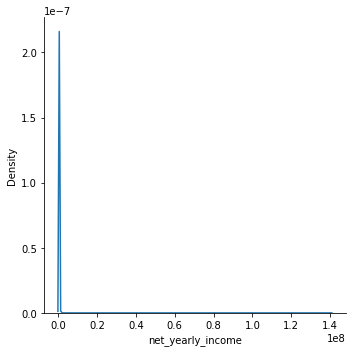

In [256]:
plt.figure(figsize=(10,7))
sns.displot(x=data['net_yearly_income'],kind='kde')
plt.plot()

[]

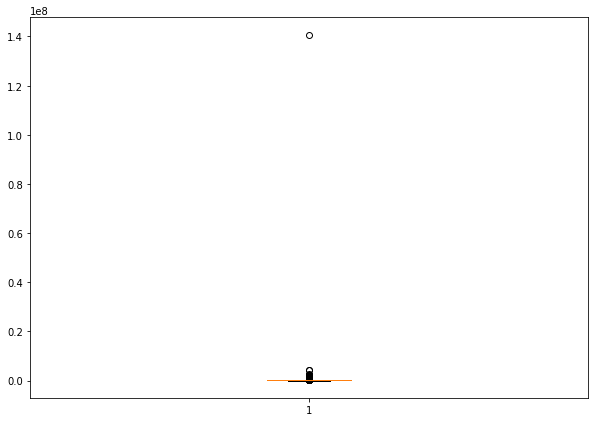

In [257]:
plt.figure(figsize=(10,7))
plt.boxplot(x=data['net_yearly_income'])
plt.plot()

## No_of_days_employed


In [258]:
data['no_of_days_employed'].head()

0      612.0
1     2771.0
2      204.0
3    11941.0
4     1459.0
Name: no_of_days_employed, dtype: float64

In [259]:
data['no_of_days_employed'].isna().sum()

463

In [260]:
data['no_of_days_employed'].fillna(data['no_of_days_employed'].median(),inplace=True)

[]

<Figure size 720x504 with 0 Axes>

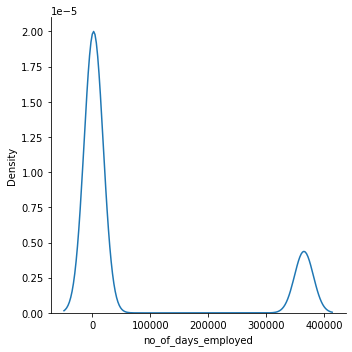

In [261]:
plt.figure(figsize=(10,7))
sns.displot(x=data['no_of_days_employed'],kind='kde')
plt.plot()

[]

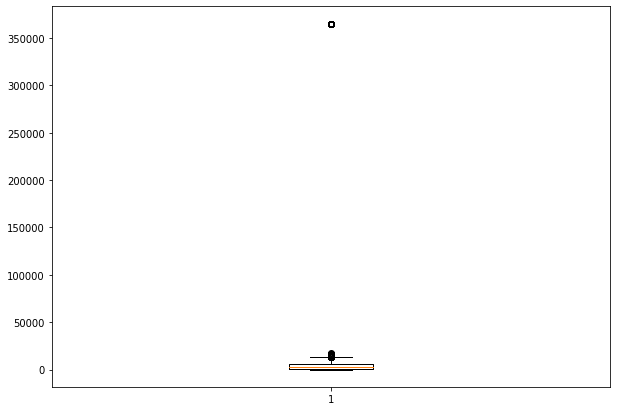

In [262]:
plt.figure(figsize=(10,7))
plt.boxplot(x=data['no_of_days_employed'])
plt.plot()

## Occupation_type

In [263]:
data['occupation_type'].head()

0       Unknown
1      Laborers
2      Laborers
3    Core staff
4    Core staff
Name: occupation_type, dtype: object

In [264]:
data['occupation_type'].unique()

array(['Unknown', 'Laborers', 'Core staff', 'Accountants',
       'High skill tech staff', 'Sales staff', 'Managers', 'Drivers',
       'Medicine staff', 'Cleaning staff', 'HR staff', 'Security staff',
       'Cooking staff', 'Waiters/barmen staff', 'Low-skill Laborers',
       'Private service staff', 'Secretaries', 'Realty agents',
       'IT staff'], dtype=object)

In [265]:
data['occupation_type'].value_counts()

Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              902
Cleaning staff             665
Private service staff      387
Low-skill Laborers         336
Waiters/barmen staff       203
Secretaries                199
Realty agents              101
HR staff                    78
IT staff                    66
Name: occupation_type, dtype: int64

In [266]:
data['occupation_type'].isna().sum()

0

In [267]:
data[data['occupation_type']=='U']

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default


In [268]:
data.drop(labels=30945,axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

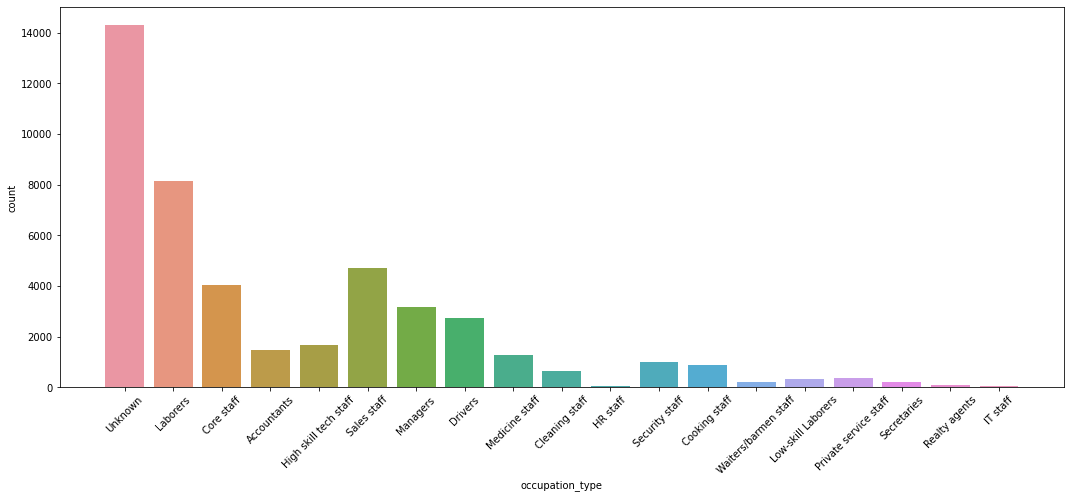

In [269]:
plt.figure(figsize=(18,7))
sns.countplot(data['occupation_type'])
plt.xticks(rotation=45)
plt.plot()

## Total_family_members

In [270]:
data['total_family_members'].head()

0    1.0
1    2.0
2    2.0
3    2.0
4    1.0
Name: total_family_members, dtype: float64

In [271]:
data['total_family_members'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6., nan,  7.,  8.,  9., 10.])

In [272]:
data['total_family_members'].value_counts()

2.0     23455
1.0      9912
3.0      7812
4.0      3623
5.0       564
6.0        57
7.0        12
8.0         6
10.0        2
9.0         1
Name: total_family_members, dtype: int64

In [273]:
data['total_family_members'].isna().sum()

83

In [274]:
data['total_family_members'].fillna(data['total_family_members'].median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

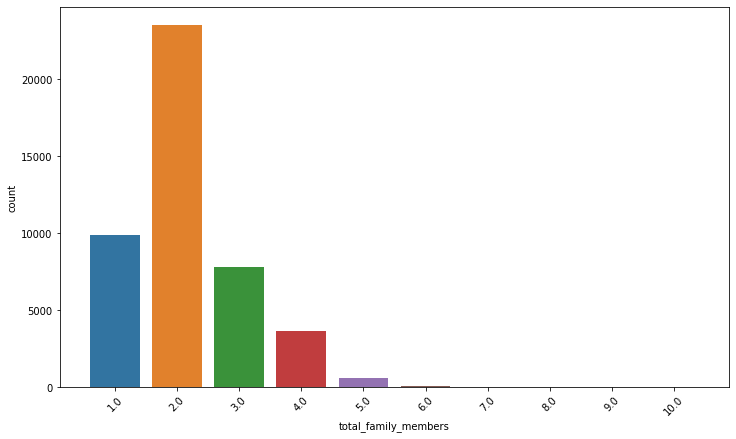

In [275]:
plt.figure(figsize=(12,7))
sns.countplot(data['total_family_members'])
plt.xticks(rotation=45)
plt.plot()

[]

<Figure size 864x504 with 0 Axes>

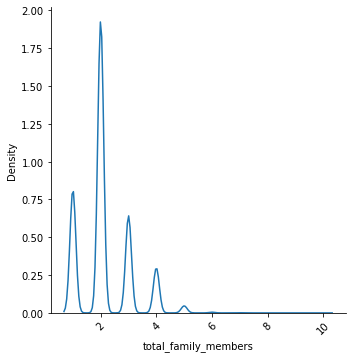

In [276]:
plt.figure(figsize=(12,7))
sns.displot(data['total_family_members'],kind='kde')
plt.xticks(rotation=45)
plt.plot()

[]

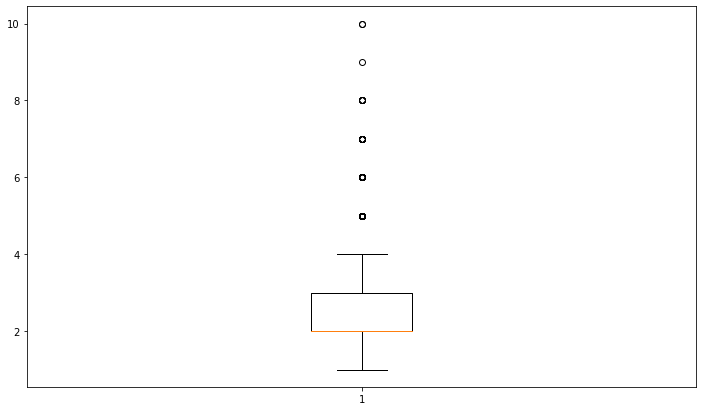

In [277]:
plt.figure(figsize=(12,7))
plt.boxplot(data['total_family_members'])
plt.plot()

## Migrant_worker

In [278]:
data['migrant_worker'].head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: migrant_worker, dtype: float64

In [279]:
data['migrant_worker'].unique()

array([ 1.,  0., nan])

In [280]:
data['migrant_worker'].value_counts()

0.0    37301
1.0     8139
Name: migrant_worker, dtype: int64

In [281]:
data['migrant_worker'].isna().sum()

87

In [282]:
data['migrant_worker'].fillna(data['migrant_worker'].median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

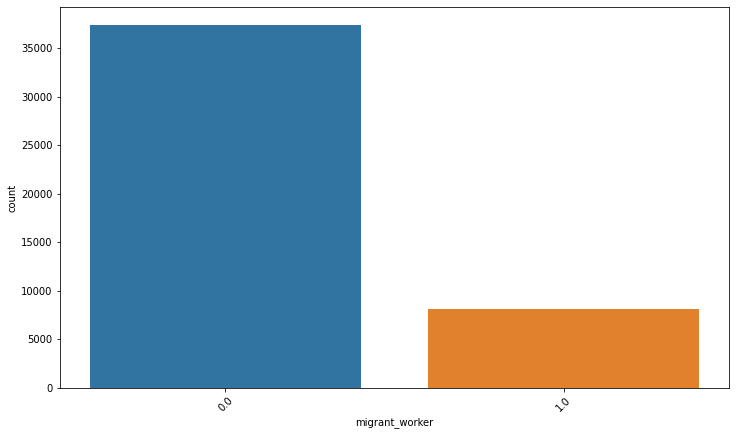

In [283]:
plt.figure(figsize=(12,7))
sns.countplot(data['migrant_worker'])
plt.xticks(rotation=45)
plt.plot()

[]

<Figure size 864x504 with 0 Axes>

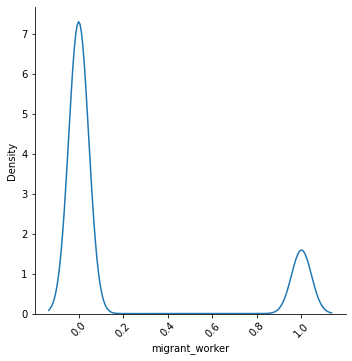

In [284]:
plt.figure(figsize=(12,7))
sns.displot(data['migrant_worker'],kind='kde')
plt.xticks(rotation=45)
plt.plot()

[]

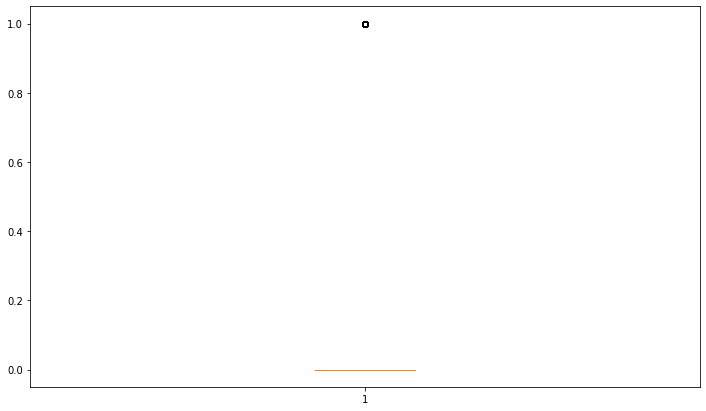

In [285]:
plt.figure(figsize=(12,7))
plt.boxplot(data['migrant_worker'])
plt.plot()

## Yearly_debt_payments

In [286]:
data['yearly_debt_payments'].head()

0    33070.28
1    15329.53
2    48416.60
3    22574.36
4    38282.95
Name: yearly_debt_payments, dtype: float64

In [287]:
data['yearly_debt_payments'].isna().sum()

95

In [288]:
data['yearly_debt_payments'].fillna(data['yearly_debt_payments'].median(),inplace=True)

[]

<Figure size 720x504 with 0 Axes>

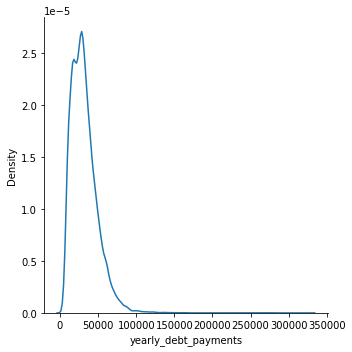

In [289]:
plt.figure(figsize=(10,7))
sns.displot(x=data['yearly_debt_payments'],kind='kde')
plt.plot()

[]

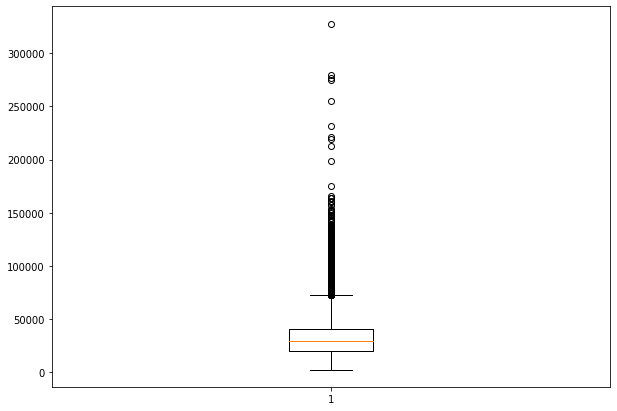

In [290]:
plt.figure(figsize=(10,7))
plt.boxplot(x=data['yearly_debt_payments'])
plt.plot()

## Credit_limit 

In [291]:
data['credit_limit'].head()

0    18690.93
1    37745.19
2    41598.36
3    32627.76
4    52950.64
Name: credit_limit, dtype: float64

In [292]:
data['credit_limit'].isna().sum()

0

[]

<Figure size 720x504 with 0 Axes>

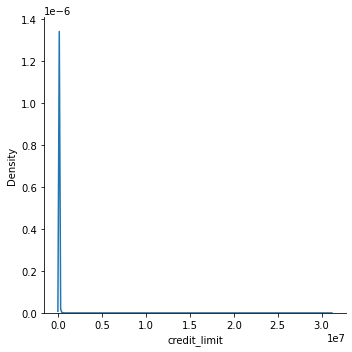

In [293]:
plt.figure(figsize=(10,7))
sns.displot(x=data['credit_limit'],kind='kde')
plt.plot()

[]

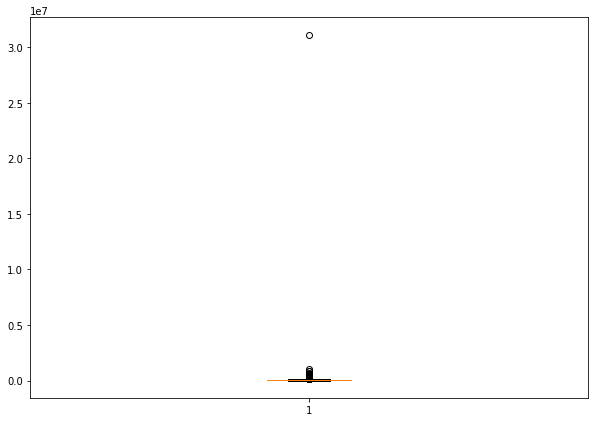

In [294]:
plt.figure(figsize=(10,7))
plt.boxplot(x=data['credit_limit'])
plt.plot()

## Credit_limit_used(%)

In [295]:
data['credit_limit_used(%)'].head()

0    73
1    52
2    43
3    20
4    75
Name: credit_limit_used(%), dtype: int64

In [296]:
data['credit_limit_used(%)'].unique()

array([73, 52, 43, 20, 75, 19, 42, 91, 14, 58, 41, 72, 40, 63, 77, 87, 84,
       97, 74, 69, 83, 50, 28, 49, 98, 36, 99, 23,  3,  8, 30, 10, 61, 32,
       55, 22, 90, 71,  5, 18, 76, 88, 47, 94, 29, 95, 37, 56, 92, 13, 79,
       81, 16,  9, 78, 15, 39, 62, 35, 67, 17, 60, 66, 48, 44, 57, 25, 27,
       53, 45, 21, 24, 65, 26,  4, 54, 85, 12, 51, 64, 89,  0,  1,  2, 34,
       31, 33,  6, 93, 46, 86, 59, 70,  7, 68, 82, 96, 38, 11, 80])

In [297]:
data['credit_limit_used(%)'].isna().sum()

0

[]

<Figure size 720x504 with 0 Axes>

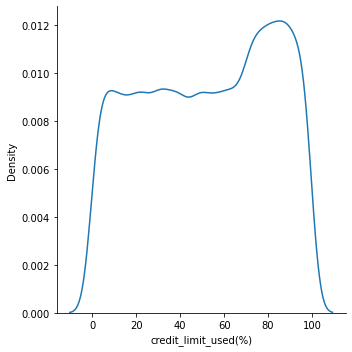

In [298]:
plt.figure(figsize=(10,7))
sns.displot(x=data['credit_limit_used(%)'],kind='kde')
plt.plot()

[]

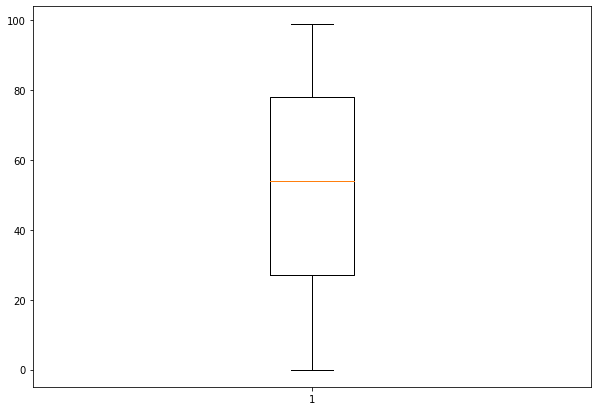

In [299]:
plt.figure(figsize=(10,7))
plt.boxplot(x=data['credit_limit_used(%)'])
plt.plot()

## Credit_score

In [300]:
data['credit_score'].head()

0    544.0
1    857.0
2    650.0
3    754.0
4    927.0
Name: credit_score, dtype: float64

In [301]:
data['credit_score'].unique()

array([544., 857., 650., 754., 927., 937., 733., 906., 783., 666., 781.,
       889., 643., 909., 874., 763., 582., 699., 753., 710., 651., 893.,
       519., 895., 801., 880., 943., 795., 886., 832., 823., 766., 904.,
       919., 922., 673., 738., 684., 851., 695., 902., 724., 931., 811.,
       848., 737., 717., 891., 814., 723., 800., 715., 692., 947., 912.,
       735., 782., 843., 900., 532., 883., 713., 679., 934., 797., 730.,
       863., 949., 702., 867., 688., 774., 923., 676., 876., 703., 667.,
       620., 926., 835., 608., 736., 655., 808., 905., 948., 658., 731.,
       825., 677., 681., 682., 946., 672., 864., 833., 815., 828., 700.,
       894., 698., 890., 793., 689., 660., 802., 810., 853., 789., 777.,
       752., 870., 761., 701., 719., 628., 785., 750., 525., 872., 640.,
       856., 888., 792., 760., 865., 696., 824., 709., 740., 668., 846.,
       929., 786., 859., 728., 917., 944., 674., 915., 665., 840., 512.,
       892., 546., 942., 794., 898., 751., 742., 71

In [302]:
data['credit_score'].isna().sum()

8

In [303]:
data['credit_score'].fillna(data['credit_score'].median(),inplace=True)

[]

<Figure size 720x504 with 0 Axes>

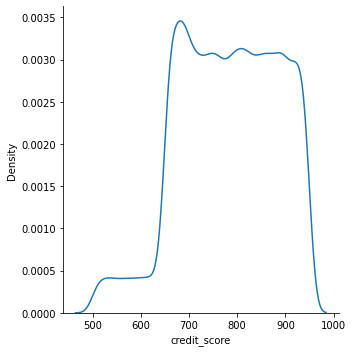

In [304]:
plt.figure(figsize=(10,7))
sns.displot(x=data['credit_score'],kind='kde')
plt.plot()

[]

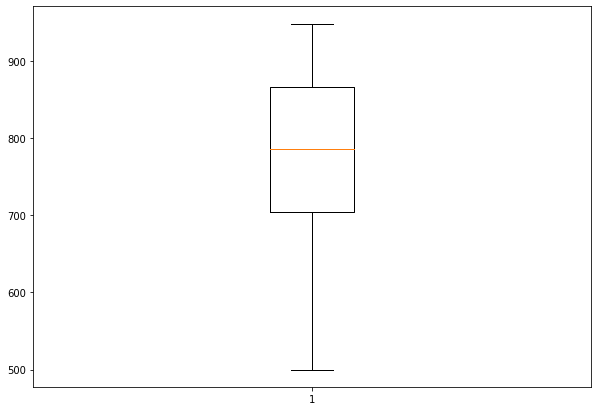

In [305]:
plt.figure(figsize=(10,7))
plt.boxplot(x=data['credit_score'])
plt.plot()

## Prev_defaults

In [306]:
data['prev_defaults'].head()

0    2
1    0
2    0
3    0
4    0
Name: prev_defaults, dtype: int64

In [307]:
data['prev_defaults'].unique()

array([2, 0, 1])

In [308]:
data['prev_defaults'].value_counts()

0    43059
1     2172
2      296
Name: prev_defaults, dtype: int64

In [309]:
data['prev_defaults'].isna().sum()

0

[]

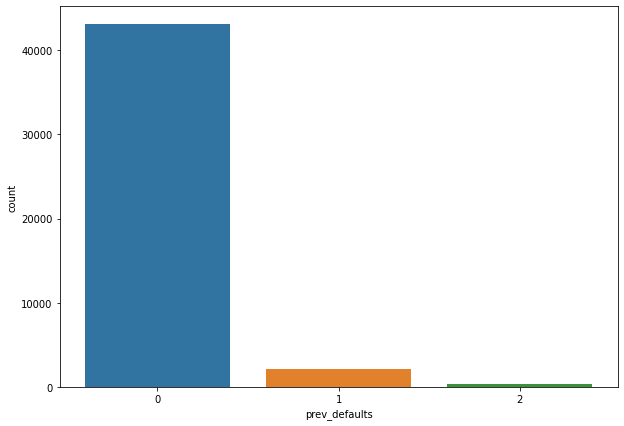

In [310]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['prev_defaults'])
plt.plot()

## Default_in_last_6months

In [311]:
data['default_in_last_6months'].head()

0    1
1    0
2    0
3    0
4    0
Name: default_in_last_6months, dtype: int64

In [312]:
data['default_in_last_6months'].unique()

array([1, 0])

In [313]:
data['default_in_last_6months'].value_counts()

0    43226
1     2301
Name: default_in_last_6months, dtype: int64

In [314]:
data['default_in_last_6months'].isna().sum()

0

[]

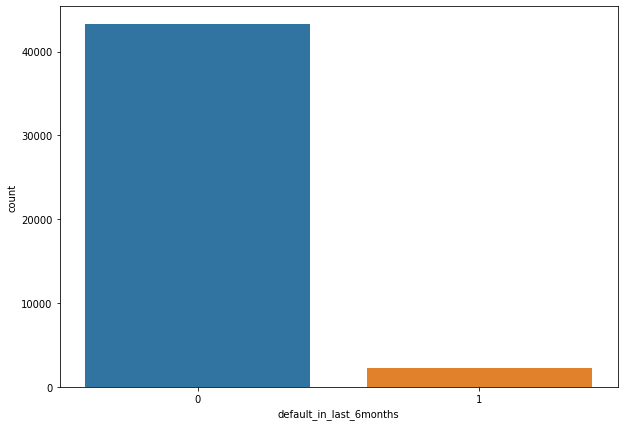

In [315]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['default_in_last_6months'])
plt.plot()

## Credit_card_default

In [316]:
data['credit_card_default'].head()

0    1
1    0
2    0
3    0
4    0
Name: credit_card_default, dtype: int64

In [317]:
data['credit_card_default'].unique()

array([1, 0])

In [318]:
data['credit_card_default'].value_counts()

0    41830
1     3697
Name: credit_card_default, dtype: int64

In [319]:
data['credit_card_default'].isna().sum()

0

[]

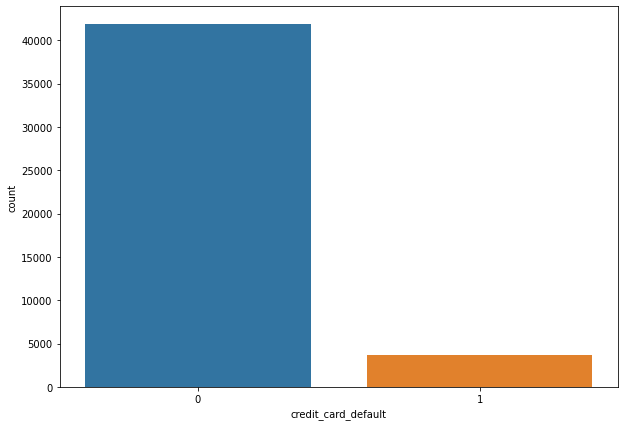

In [320]:
plt.figure(figsize=(10,7))
sns.countplot(x=data['credit_card_default'])
plt.plot()

## Resetting Index

In [321]:
data.reset_index(inplace = True)

## Splitting the dataset

In [322]:
data.columns

Index(['index', 'customer_id', 'name', 'age', 'gender', 'owns_car',
       'owns_house', 'no_of_children', 'net_yearly_income',
       'no_of_days_employed', 'occupation_type', 'total_family_members',
       'migrant_worker', 'yearly_debt_payments', 'credit_limit',
       'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months', 'credit_card_default'],
      dtype='object')

In [323]:
X=data.drop(['index','customer_id','name','credit_card_default'],axis=1)

In [324]:
X.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1
1,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0
2,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0
3,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0
4,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0


[]

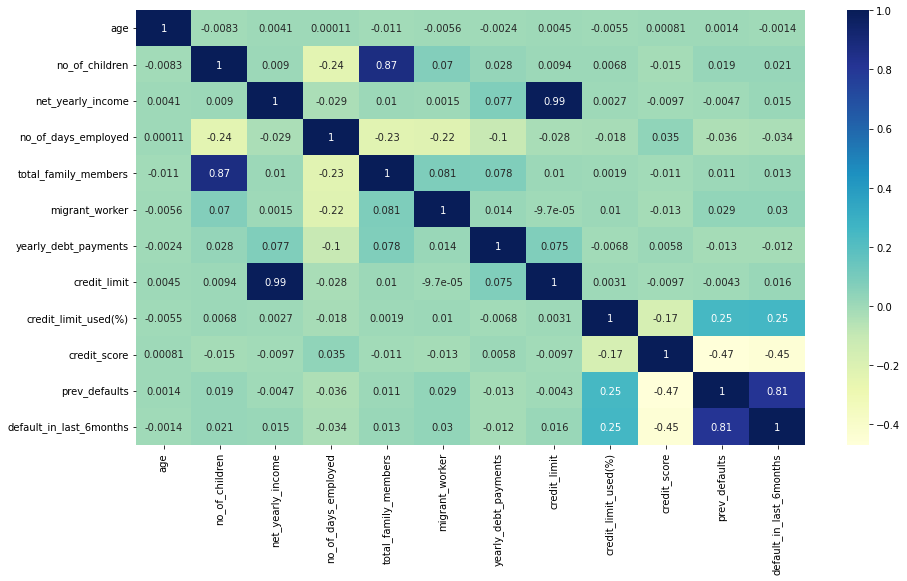

In [325]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)
plt.xticks()
plt.yticks()
plt.plot()

In [326]:
Y=data[['credit_card_default']]

In [327]:
Y.head()

,credit_card_default
0,1
1,0
2,0
3,0
4,0


In [328]:
X_new=pd.get_dummies(X,drop_first=True)

In [329]:
X_new.head()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,gender_M,gender_XNA,owns_car_Y,owns_house_Y,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
0,46,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,29,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,37,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,39,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,46,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [330]:
X_new.shape

(45527, 34)

## Standardizind the dataset

In [331]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
X_scaled = scaler.fit_transform(X_new)

## Splitting the dataset

In [332]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2)

In [333]:
x_train.shape

(36421, 34)

## Model Building

In [334]:
import tensorflow as tf
from tensorflow import keras

In [335]:
model=keras.Sequential([
                        keras.layers.Dense(8,activation='relu',input_shape=[34]),
                        keras.layers.Dense(8,activation='relu'),
                        keras.layers.Dense(5,activation='relu'), 
                        keras.layers.Dense(5,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')
])

In [336]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [337]:
history=model.fit(x_train,y_train,epochs=10,verbose=1,batch_size=64,validation_split=0.1)


Epoch 1/10
513/513 [==============================] - 2s 2ms/step - loss: 0.2742 - accuracy: 0.9194 - val_loss: 0.1220 - val_accuracy: 0.9514
Epoch 2/10
513/513 [==============================] - 1s 2ms/step - loss: 0.0707 - accuracy: 0.9767 - val_loss: 0.0697 - val_accuracy: 0.9745
Epoch 3/10
513/513 [==============================] - 1s 2ms/step - loss: 0.0532 - accuracy: 0.9801 - val_loss: 0.0645 - val_accuracy: 0.9745
Epoch 4/10
513/513 [==============================] - 1s 2ms/step - loss: 0.0518 - accuracy: 0.9800 - val_loss: 0.0622 - val_accuracy: 0.9747
Epoch 5/10
513/513 [==============================] - 1s 2ms/step - loss: 0.0490 - accuracy: 0.9809 - val_loss: 0.0605 - val_accuracy: 0.9750
Epoch 6/10
513/513 [==============================] - 1s 2ms/step - loss: 0.0480 - accuracy: 0.9810 - val_loss: 0.0595 - val_accuracy: 0.9753
Epoch 7/10
513/513 [==============================] - 1s 2ms/step - loss: 0.0477 - accuracy: 0.9810 - val_loss: 0.0595 - val_accuracy: 0.9761
Epoch 

In [339]:
model.save('/content/american_express_v1')

INFO:tensorflow:Assets written to: /content/american_express_v1/assets


In [349]:
y_pred=model.predict(x_test)
y_pred_new=[]
for i in y_pred:
  if(i>0.5):
    y_pred_new.append(1)
  else:
    y_pred_new.append(0)

In [350]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_new))

0.9782560948824951


In [352]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8350
           1       0.98      0.75      0.85       756

    accuracy                           0.98      9106
   macro avg       0.98      0.88      0.92      9106
weighted avg       0.98      0.98      0.98      9106



In [ ]:
from google.colab import files
files.download('/content/american_express_v1') 

In [365]:
files.download('/content/saved_model/my_model/saved_model.pb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [361]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


## Test data

In [367]:
reconstructed_model = keras.models.load_model("/content/american_express_v1")

In [368]:
test=pd.read_csv("test.csv")

In [369]:
test.shape

(11383, 18)

In [370]:
test.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [371]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              11383 non-null  object 
 1   name                     11383 non-null  object 
 2   age                      11383 non-null  int64  
 3   gender                   11383 non-null  object 
 4   owns_car                 11251 non-null  object 
 5   owns_house               11383 non-null  object 
 6   no_of_children           11193 non-null  float64
 7   net_yearly_income        11383 non-null  float64
 8   no_of_days_employed      11278 non-null  float64
 9   occupation_type          11383 non-null  object 
 10  total_family_members     11352 non-null  float64
 11  migrant_worker           11357 non-null  float64
 12  yearly_debt_payments     11361 non-null  float64
 13  credit_limit             11383 non-null  float64
 14  credit_limit_used(%)  

In [372]:
test.isna().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   132
owns_house                   0
no_of_children             190
net_yearly_income            0
no_of_days_employed        105
occupation_type              0
total_family_members        31
migrant_worker              26
yearly_debt_payments        22
credit_limit                 0
credit_limit_used(%)         0
credit_score                 3
prev_defaults                0
default_in_last_6months      0
dtype: int64

In [374]:
test.drop(['customer_id','name'],axis=1,inplace=True)

In [376]:
test['age'].head()

0    52
1    48
2    50
3    30
4    52
Name: age, dtype: int64

In [378]:
test.age.value_counts()

47    392
49    376
36    370
41    367
27    362
25    360
55    359
44    356
51    350
23    349
24    347
54    347
53    346
26    346
31    344
52    343
40    343
46    342
29    342
37    341
42    341
33    339
48    339
30    338
50    336
35    333
45    332
38    329
28    329
43    328
32    323
34    318
39    316
Name: age, dtype: int64

In [379]:
test.gender.unique()

array(['F', 'M', 'XNA'], dtype=object)

In [380]:
test.gender.value_counts()

F      7443
M      3939
XNA       1
Name: gender, dtype: int64

In [382]:
test.owns_car.unique()
test.owns_car.fillna(test.owns_car.mode()[0],inplace=True)

In [383]:
test.no_of_children.unique()

array([ 0.,  1.,  2., nan,  3.,  5.,  4.,  7., 11.])

In [384]:
test.no_of_children.fillna(test.no_of_children.median(),inplace=True)     

In [385]:
test.no_of_days_employed .fillna(test.no_of_days_employed .median(),inplace=True)

In [386]:
test.total_family_members .fillna(test.total_family_members .median(),inplace=True)   

In [387]:
test.migrant_worker .fillna(test.migrant_worker .median(),inplace=True) 

In [388]:
test.yearly_debt_payments .fillna(test.yearly_debt_payments .median(),inplace=True)

In [389]:
test.credit_score .fillna(test.credit_score .median(),inplace=True)

In [390]:
test.isna().sum()

age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
dtype: int64

In [391]:
test_new=pd.get_dummies(test,drop_first=True)

In [392]:
test_new.shape

(11383, 34)

In [396]:
X_new.head()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,gender_M,gender_XNA,owns_car_Y,owns_house_Y,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
0,46,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,29,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,37,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,39,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,46,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [393]:
test_new.head()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,gender_M,gender_XNA,owns_car_Y,owns_house_Y,occupation_type_Cleaning staff,occupation_type_Cooking staff,occupation_type_Core staff,occupation_type_Drivers,occupation_type_HR staff,occupation_type_High skill tech staff,occupation_type_IT staff,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
0,52,0.0,232640.53,998.0,2.0,0.0,14406.73,26524.40,4,779.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,48,1.0,284396.79,1338.0,3.0,0.0,57479.99,68998.72,70,806.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,50,1.0,149419.28,1210.0,3.0,0.0,21611.01,25187.80,71,528.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,30,1.0,160437.54,503.0,2.0,1.0,28990.76,29179.39,9,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,52,0.0,233480.37,157.0,2.0,1.0,54213.72,82331.82,82,613.0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [400]:
print(test_new.shape)
print(X_new.shape)

(11383, 35)
(45527, 34)


In [406]:
test_new.drop(['index'],axis=1,inplace=True)

In [407]:
# for i in test_new.columns:
#   if i in X_new.columns:
#     print(f"{i} is present")
#   else:
#     print("*****")
#     print(f"{i} is not present")

In [408]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
test_scaled = scaler.fit_transform(test_new)

In [409]:
test_predicted=reconstructed_model.predict(test_scaled)

In [412]:
test_predicted_list=[]
for i in test_predicted:
  if(i>0.5):
    test_predicted_list.append(1)
  else:
    test_predicted_list.append(0)

In [414]:
test_dataframe=pd.DataFrame(test_predicted_list)

In [416]:
test_dataframe.head()

,0
0,0
1,0
2,1
3,0
4,1


In [417]:
test_dataframe.to_csv('american_express_predicted.csv')